## <center> **C1.2 - Cálculo de líneas de corriente, trazas y trayectorias** </center>


###<center> Tema 1. Mecánica de fluidos, Curso 2021-2022</center>
####<center> Adrián Navas Montilla</center>

-----------------------------------------


Disponemos de una fuente ornamental que genera un flujo no estacionario descrito por el siguiente campo de velocidad:

$$\mathbf{v}=u_0\sin\left(w\left(t-\frac{y}{v_0}\right)\right)\mathbf{\hat{i}}+v_0\mathbf{\hat{j}}$$

Se pide lo siguiente:

**a.1)** Calcular la expresión general de las líneas de corriente

**a.2)** Calcular la expresión de la línea de corriente que pasa por $(x,y)=(0,0)$ en el instante $t=0$.

**b.1)** Calcular la expresión general de las trayectorias de la partículas.

**b.2)** Calcular la trayectoria de la partícula que pasa por el origen en $t=\pi/2w$.

**c)** Hacer una representación gráfica de las anteriores

**a) Cálculo de las líneas de corriente (streamlines)**

Las líneas de corriente son aquellas curvas tangentes al vector velocidad. Por lo tanto, cumplirán:

$$ d\mathbf{r}\times \mathbf{v}=0$$

donde $d\mathbf{r}=(dx,dy)$ y $\mathbf{v}=(u,v)$.

Se calculan mediante la siguiente ecuación diferencial:
$$ \frac{dx}{dy}= \frac{u}{v}$$

Vamos a utilizar Python para integrar esta ecuación diferencial y obtener $x(y)$, que representa las lineas de corriente.

Lo primero que debemos hacer es cargar las librerías necesarias de Python. Para este problema, en particular, será de gran utilidad la librería *sympy* que permite realizar cálculo simbólico.

In [ ]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi

Y después definiremos las variables simbólicas necesarias (aquellas con las que tendremos que trabajar y que no se les ha asignado ningún valor, por lo que son "símbolos").

In [ ]:
x,y=symbols('x y') #Declaramos x e y como variable simbólica.
t,u0,v0,w=symbols('t u0 v0 w',positive=True) # Declaramos estas variables simbólicas, especificando además que van a ser siempre positivas (esto sirve para facilitarle a Python hacer las integrales)
x_st = symbols('x_st', cls=Function) #Esta variable además será una función

Ahora definiremos las componentes de la velocidad, $u$ y $v$, así como la ecuación diferencial de las trayectorias. Para esto último usaremos la función *equality* ```Eq(a,b)``` que permite escribir una igualdad del tipo $a=b$. Para expresar la derivada $df(y)/dy$ se utiliza ```f(y).diff(y)```.

In [ ]:
u=u0*sin(w*(t-y/v0))
v=v0

eq = Eq(x_st(y).diff(y), u/v)  #Definimos la ecuación diferencial ordinaria (EDO): dx/dy=u/v

print('Esta es la ecuación diferencial a resolver:\n')
display(eq)

Esta es la ecuación diferencial a resolver:



Eq(Derivative(x_st(y), y), u0*sin(w*(t - y/v0))/v0)

Ahora que ya hemos definido la ecuación diferencial y la hemos guardado en la variable ```eq```, vamos a resolverla. Para ello utilizamos la función ```dsolve```:

In [ ]:
edo_sol = dsolve(eq) #Resolvemos la EDO

print('Al integrar la ecuación diferencial obtenemos la ecuación de la línea de corriente:\n')
display(factor(edo_sol))

Al integrar la ecuación diferencial obtenemos la ecuación de la línea de corriente:



Eq(x_st(y), (C1*w + u0*cos(t*w - w*y/v0))/w)

Como podemos observar, la ecuación de la linea de corriente depende de una constante $C_1$, producto de la integración. Esto nos indica que existen infinitas líneas de corriente.

Si queremos por ejemplo obtener la línea de corriente que pasa por $(x,y)=(0,0)$, lo primero que haremos será sustituir en la solución (almacenada en la variable ```edo_sol```) los valores $x=y=0$. Para ello haremos lo siguiente:

In [ ]:
C_eq = Eq(edo_sol.rhs.subs(y, 0), 0) #donde edo_sol.rhs se refiere al lado derecho de la ecuación (right hand side)
display(C_eq)

Eq(C1 + u0*cos(t*w)/w, 0)

Y ahora despejaremos $C_1$ de esta ecuación:

In [ ]:
C1 = solve(C_eq)[0]
display(C1)

{C1: -u0*cos(t*w)/w}

Finalmente, sustituimos el valor obtenido de $C_1$ en la solución (almacenada en ```edo_sol```), obteniendo:

In [ ]:
linea_corriente = edo_sol.subs(C1)
display(factor(linea_corriente))

Eq(x_st(y), u0*(-cos(t*w) + cos(t*w - w*y/v0))/w)

Si ahora queremos obtener la línea de corriente en el tiempo $t=0$:

In [ ]:
display(factor(linea_corriente.subs(t,0)))

Eq(x_st(y), u0*(cos(w*y/v0) - 1)/w)

**b) Cálculo de las trayectorias (pathlines)**

Las trayectorias vienen dadas por los puntos del plano por los que ha pasado una partícula fluida. Se calculan mediante la ecuación:

$$ \frac{d\mathbf{r}(t)}{dt}= \mathbf{v}(\mathbf{r}(t),t)$$

que en realidad es un sistema de dos ecuaciones:

$$ \frac{dx(t)}{dt}= u(x,y,t)$$
$$ \frac{dy(t)}{dt}= v(x,y,t)$$


Para comenzar vamos a importar la función ```dsolve_system``` del paquete Sympy que permite resolver sistemas de ecuaciones diferenciales:

In [ ]:
from sympy.solvers.ode.systems import dsolve_system

Ahora vamos a definir las coordenadas de las trayectorias como variables simbólicas de tipo "función". Además, vamos a definir las coordenadas iniciales y el tiempo inicial como variables simbólicas también. Finalmente, también definimos las dos ecuaciones diferenciales que componen el sistema:

In [ ]:
x_tr,y_tr = symbols('x_tr y_tr', cls=Function) #Definimos las funciones de las trayectorias
t0,x0,y0 = symbols('t0 x0 y0')

eqs = [Eq(x_tr(t).diff(t), u0*sin(w*(t-y_tr(t)/v0))), Eq(y_tr(t).diff(t), v0)]

Para obtener las trayectorias debemos resolver el sistema de ecuaciones mediante la integración de cada una de ellas:
$$ \mathbf{r}(t)= \mathbf{r}_0 + \int_{t_0}^{t}\mathbf{v}(\mathbf{r}(t),t)dt$$

donde debemos tener especial cuidado en la dependencia temporal de los argumentos de las funciones $u$ y $v$ (las ecuaciones de las trayectorias no son independientes, forman un sistema y están "acopladas"). 

Gracias a la función ```dsolve_system```, podemos obtener facilmente la solución del sistema de la siguiente manera:

In [ ]:
edo_sol2 = dsolve_system(eqs, t=t) #ics={x_tr(t0): x0, y_tr(t0): y0}

trayectoria1 = edo_sol2[0][0]
trayectoria2 = edo_sol2[0][1]

print('La solución del sistema es:\n')
display(factor(trayectoria1))
display(factor(trayectoria2))

trayectoria1 = edo_sol2[0][0].doit()
trayectoria2 = edo_sol2[0][1].doit()

print('\n Al integrar, obtenemos:\n')
display(factor(trayectoria1))
display(factor(trayectoria2))

La solución del sistema es:



Eq(x_tr(t), C1 - u0*Integral(sin(C2*w/v0 - t*w + w*Integral(1, t)), t))

Eq(y_tr(t), C2 + v0*Integral(1, t))


 Al integrar, obtenemos:



Eq(x_tr(t), C1 - t*u0*sin(C2*w/v0))

Eq(y_tr(t), C2 + t*v0)

De la misma manera que en el cálculo de las líneas de corriente, si queremos obtener una trayectoria particular debemos dar valor a las constantes de integración $C_1$ y $C_2$. 

En este caso, en vez de dar un valor numérico a $x_0$, $y_0$ y $t_0$, vamos a dejar la solución en función de éstas (que hemos declarado previamente como variables simbólicas para ello.

Seguimos el mismo procedimiento que en el cálculo de las líneas de corriente:

In [ ]:
print('')
print('Imponemos la condición de contorno:')
C_eq = Eq(trayectoria2.rhs.subs(t, t0), y0) 
display(C_eq)
C2 = solve(C_eq)[0]
display(C2)

print('')
print('Imponemos la condición de contorno:')
C_eq = Eq(trayectoria1.rhs.subs(t, t0), x0) 
display(C_eq)
C1 = solve(C_eq)[0]
display(C1)

trayectoria1_f=trayectoria1.subs(C1).subs(C2)
trayectoria2_f=trayectoria2.subs(C2)

print('')
print('Y sustituyendo las constantes de integración:')
display(factor(trayectoria1_f))
display(factor(trayectoria2_f))


Imponemos la condición de contorno:


Eq(C2 + t0*v0, y0)

{C2: -t0*v0 + y0}


Imponemos la condición de contorno:


Eq(C1 - t0*u0*sin(C2*w/v0), x0)

{C1: t0*u0*sin(C2*w/v0) + x0}


Y sustituyendo las constantes de integración:


Eq(x_tr(t), t*u0*sin(t0*w - w*y0/v0) - t0*u0*sin(t0*w - w*y0/v0) + x0)

Eq(y_tr(t), t*v0 - t0*v0 + y0)

lo que podemos reescribir como:

$$\frac{x_{tr}-x_0}{y_{tr}-y_0} = \frac{u_0}{v_0}\sin\left(wt_0-\frac{wy_0}{v_0} \right)$$


Si queremos calcular la trayectoria de la partícula que pasa por el origen en $t=\pi/2w$, simplemente sustituiremos $t_0=\pi/2w$, $x_0=y_0=0$.

In [ ]:
trayectoria1_fp=trayectoria1_f.subs([(t0, pi/2/w), (y0, 0), (x0,0)])
trayectoria2_fp=trayectoria2_f.subs([(t0, pi/2/w), (y0, 0), (x0,0)])

print('Y sustituyendo las constantes de integración:\n')
display(factor(trayectoria1_fp))
display(factor(trayectoria2_fp))

Y sustituyendo las constantes de integración:



Eq(x_tr(t), u0*(2*t*w - pi)/(2*w))

Eq(y_tr(t), v0*(2*t*w - pi)/(2*w))

De donde se observa la relación:

$$x/y=u_0/v_0$$

**c) Representación gráfica**

(-3.141592653589793, 3.141592653589793)

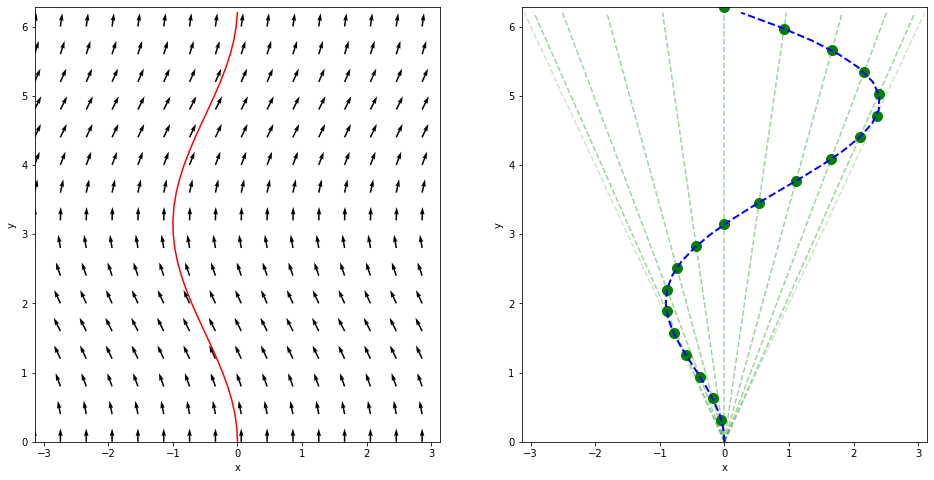

In [ ]:
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

delta = 0.2 #malla espacial
nq=2        #separacion entre vectores en quiver plot

# Damos valor a las constantes del problema
u0 =1.0
v0 =2.0
w  =2.0

#Calculamos la longitud de onda y el periodo
lmb = 2.0*math.pi*v0/w #longitud de onda
Tp  = 2.0*math.pi/w    #periodo

t=Tp #Definimos el instante temporal para el cual vamos a hacer la representación gráfica. Podemos elegir cualquier valor!

L=0.50*lmb 

#Generamos la malla de puntos en los que haremos la representación gráfica
xp = np.arange(-L, L, delta) #generamos un vector de puntos en la dirección x, desde -L hasta L, con un espaciado "delta"
yp = np.arange(0, 2*L, delta) #lo mismo en la dirección Y
X, Y = np.meshgrid(xp, yp) #con esto generamos una matriz de puntos

#Evaluamos las componentes de la velocidad en esos puntos
U = u0*np.sin(w*(t-Y/v0))
V = v0*np.ones((len(yp),len(xp)))

#Generamos la figura, en este caso 2 figuras
fig, (ax,ax2) = plt.subplots(1,2,figsize=(16, 8))

#------ Figura izquierda (ax) ------
#Representamos el campo de velocidades y la linea de corriente que pasa por el origen
ax.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq]) #la función quiver nos permite hacer la representación de un campo vectorial
xx=u0/w*(np.cos(w*(t-yp/v0))-cos(w*t)) #ecuación de la línea de corriente que pasa por el origen en t. En xx almacenamos el vector de valores.
ax.plot(xx,yp,'r-') #la función plot nos permite representar una curva pasándole vectores xx y yp
#ax.streamplot(X,Y,U,V) #Con esta función podemos hacer una representación de las lineas de corriente sin tener que calcularlas!

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim([0, 2*L])
ax.set_xlim([-L, L])

#------ Figura derecha (ax2) ------
npoints=20
delta=Tp/npoints
for i in range(0,npoints):
    t0 =delta*i
    yy1 =v0*(t-t0)                        #esta es la posición y de la partícula fluida en el instante "t" que ha pasado por el origen en "t0"
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0)) #esta es la posición x de la partícula fluida en el instante "t" que ha pasado por el origen en "t0"
    ax2.plot(xx1,yy1, 'g.', ms=20)
    xx=u0/v0*yp*np.sin(w*t0)              #esta es la ecuación de la trayectoria de la particula que ha pasado por el origen en "t0"
    ax2.plot(xx, yp, 'g--', lw=1.5, alpha=.2)

xx=u0/v0*yp*np.sin(w*(t-yp/v0))           #esta es la ecuación de la traza
ax2.plot(xx, yp, 'b--', lw=2)

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([0, 2*L])
ax2.set_xlim([-L, L])

## **Animación**


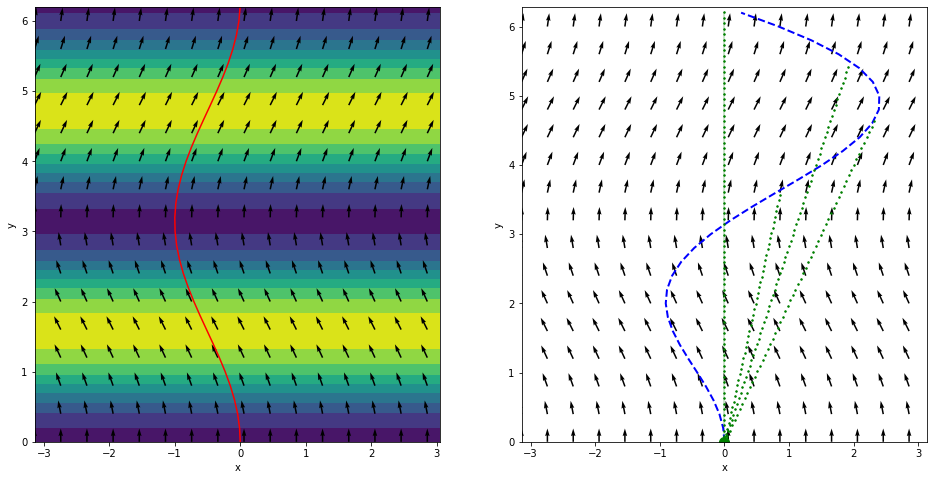

In [ ]:
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas
from matplotlib import animation
from IPython.display import HTML

delta = 0.2 #malla espacial
nq=2        #separacion entre vectores en quiver plot

u0 =1.0
v0 =2.0
w  =2.0

lmb = 2.0*math.pi*v0/w #longitud de onda
Tp  = 2.0*math.pi/w    #periodo

L=0.50*lmb

xp = np.arange(-L, L, delta)
yp = np.arange(0, 2*L, delta)
X, Y = np.meshgrid(xp, yp)


t=0.0
U = u0*np.sin(w*(t-Y/v0))
V = v0*np.ones((len(yp),len(xp)))


fig, (ax,ax2) = plt.subplots(1,2,figsize=(16, 8))
Q = ax2.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
line2, = ax2.plot([], [], 'g-', lw=2, alpha=.2) 
line1, = ax2.plot([], [], 'b--', lw=2) 
pt1, = ax2.plot([], [], 'g.', ms=20)
pt2, = ax2.plot([], [], 'g.', ms=20)
pt3, = ax2.plot([], [], 'g.', ms=20)
pt4, = ax2.plot([], [], 'g.', ms=20)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_ylim([0, 2*L])
ax2.set_xlim([-L, L])

nframes=80    #frames de la animacion
tf=Tp         #tiempo total
dt=Tp/nframes #paso de tiempo

def update_plot(num):

    t = dt*num

    U = u0*np.sin(w*(t-Y/v0))

    ax.clear()
    ax.contourf(X,Y,np.sqrt(U**2+V**2))
    ax.quiver(X[::nq,::nq], Y[::nq,::nq], U[::nq,::nq], V[::nq,::nq])
    xx=u0/w*(np.cos(w*(t-yp/v0))-cos(w*t))
    ax.plot(xx,yp,'r-')

    ax.set_xlabel("x")
    ax.set_ylabel("y")

    Q.set_UVC(U[::nq,::nq],V[::nq,::nq])

    xx=u0/v0*yp*np.sin(w*(t-yp/v0))
    line1.set_data(xx, yp)

    xx=u0/v0*yp*np.sin(w*t)
    line2.set_data(xx, yp)

    t0 =0.0*Tp/4
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt1.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.125*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt2.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.25*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt3.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    t0 =0.42*Tp
    yy1 =v0*(t-t0)
    yy0= 0.0
    xx1=u0/v0*yy1*(np.sin(w*t0-w/v0*yy0))
    pt4.set_data(xx1,yy1)
    ax2.plot(xx1,yy1, 'g.', ms=3)

    return

anim = animation.FuncAnimation(fig, update_plot, frames=nframes, interval=80, blit=False)

HTML(anim.to_html5_video())    

